In [57]:
from scipy.stats import pareto
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

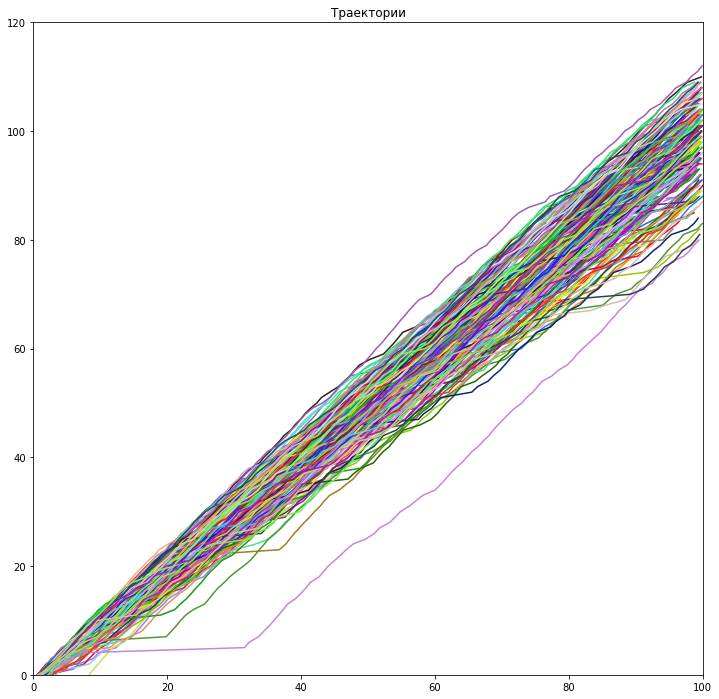

In [58]:
k = 2.73 #  параметр формы
x_m = 0.634 # коэффициент масштаба
T=100
plt.figure(figsize=(12,12))
N_for_T = np.array([]) # число восстановлений для Т 
S_n_for_T = np.array([]) # массив из S_n для каждой траектории для Т
S_n_plus_1_for_T = np.array([]) # массив из S_n+1 для каждой траектории (для возраста) для Т
# строим процесс восстановления для T
for i in range(1, 200): # строим 200 траекторий
    X = pareto.rvs(k, scale = x_m)
    total = X # инициализируем s1
    totals = np.array([])
    totals = np.append(totals, X) # это S_n для одной траектории
    n_for_T = 0 # это n маленькое
    while totals[n_for_T] < T:
        X = pareto.rvs(k, scale = x_m)
        if total + X > T:
            S_n_for_T = np.append(S_n_for_T, total)
            S_n_plus_1_for_T = np.append(S_n_plus_1_for_T, total + X)
        total += X
        totals = np.append(totals, total)
        n_for_T += 1
    N_for_T = np.append(N_for_T, n_for_T)       
    plt.xlim(0, T)
    plt.ylim(0, 120)
    plt.title('Траектории')
    color_random = np.random.randint(0, 255, 3) / 255
    plt.plot(totals[0:-1], range(0,n_for_T), color = color_random)

In [63]:
# процесс восстановления для Т / 2 (нужно для ЗБЧ И ЦПТ)
N_for_half_T = np.array([]) # число восстановлений для Т / 2
S_n_for_half_T = np.array([]) # массив из S_n для каждой траектории для Т / 2
S_n_plus_1_for_half_T = np.array([]) # массив из S_n+1 для каждой траектории (для возраста) для Т / 2

for i in range(1, 200): # строим 199 траекторий
    X = pareto.rvs(k, scale = x_m)
    total = X # инициализируем s1
    totals = np.array([])
    totals = np.append(totals, X) # это S_n для одной траектории
    n_for_half_T = 0 # то же что и n но для T / 2
    while totals[n_for_half_T] < T / 2:
        X = pareto.rvs(k, scale = x_m)
        if total + X > T/2:
            S_n_for_half_T = np.append(S_n_for_half_T, total)
            S_n_plus_1_for_half_T = np.append(S_n_plus_1_for_half_T, total + X)

        n_for_half_T += 1
        total += X
        totals = np.append(totals, total)
        
            
    N_for_half_T = np.append(N_for_half_T, n_for_half_T)

[54. 51. 48. 50. 47. 56. 59. 53. 52. 47. 54. 45. 46. 53. 51. 54. 57. 53.
 51. 48. 53. 55. 55. 53. 54. 52. 44. 52. 49. 53. 53. 54. 54. 51. 52. 54.
 57. 47. 51. 49. 52. 53. 47. 42. 46. 49. 55. 53. 50. 49. 49. 46. 53. 57.
 48. 52. 54. 52. 54. 48. 51. 44. 56. 49. 54. 48. 47. 55. 45. 54. 46. 54.
 54. 49. 54. 57. 52. 51. 54. 54. 55. 50. 55. 47. 42. 49. 47. 50. 52. 52.
 56. 48. 43. 56. 52. 50. 45. 49. 46. 49. 57. 50. 50. 55. 40. 37. 54. 47.
 46. 54. 48. 50. 44. 53. 57. 44. 20. 51. 50. 43. 50. 44. 39. 46. 53. 54.
 46. 54. 50. 44. 51. 51. 55. 44. 38. 47. 52. 51. 48. 50. 49. 49. 52. 53.
 51. 51. 44. 51. 48. 52. 55. 43. 47. 47. 45. 54. 51. 50. 47. 57. 50. 41.
 51. 54. 49. 46. 51. 50. 50. 49. 46. 51. 47. 47. 49. 44. 53. 55. 50. 53.
 52. 50. 52. 53. 51. 51. 49. 41. 52. 50. 46. 49. 46. 49. 49. 52. 53. 53.
 54.]
[49.75473738 49.20478367 49.98168515 49.37748422 49.37319958 49.99944042
 49.50214967 49.9911351  49.00492737 49.83268544 49.25274757 49.56834185
 49.78445265 49.52324355 48.37379057 49.47534

In [60]:
# ЗБЧ для Т
M = 1
left_part_for_T = N_for_T[-1] / T
right_part_for_T = 1 / M

print(left_part_for_T, right_part_for_T)

1.0 1.0


In [64]:
# ЗБЧ для Т / 2
left_part_for_half_T = N_for_half_T[-1] / (T / 2)
right_part_for_half_T = 1 / M

print(left_part_for_half_T, right_part_for_half_T)

1.08 1.0


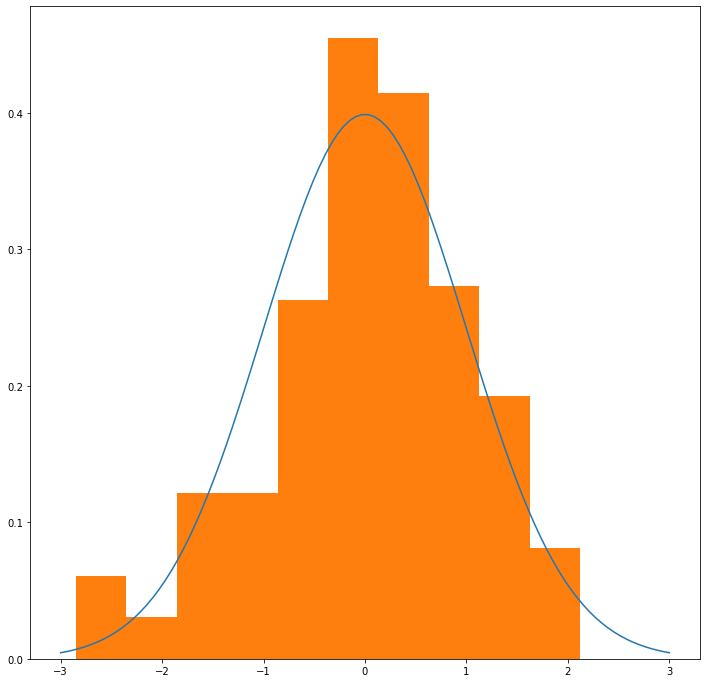

In [88]:
# %ЦПТ для T
from scipy.stats import norm

z_for_T = (N_for_T - np.mean(N_for_T)) / np.std(N_for_T)

mu = 0
sigma = 1

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

plt.figure(figsize=(12,12))
plt.plot(x, norm.pdf(x, mu, sigma))
plt.hist(z_for_T, density=True)
plt.show()

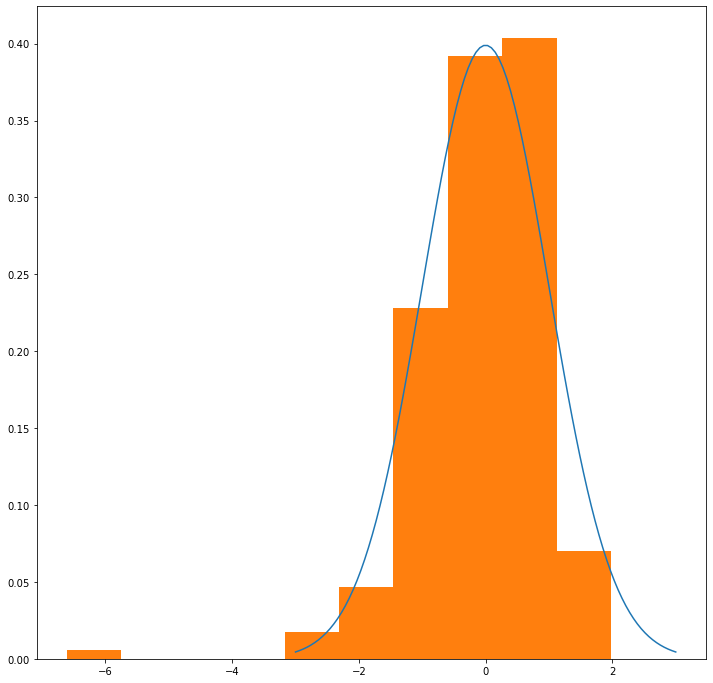

In [89]:
# %ЦПТ для T / 2

z_for_half_T = (N_for_half_T - np.mean(N_for_half_T)) / np.std(N_for_half_T)

plt.figure(figsize=(12,12))
plt.plot(x, norm.pdf(x, mu, sigma))
plt.hist(z_for_half_T, density=True)
plt.show()

In [93]:
x_

0.634

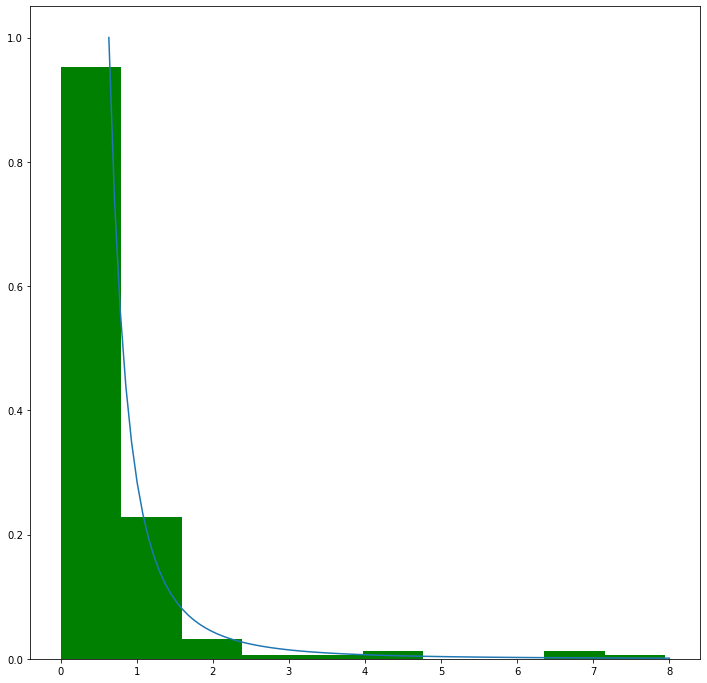

In [95]:
# возраст для T
def lim_density_Z(x):
    return (1 - pareto.cdf(x, k, scale = x_m)) / M

Z_plus = np.array([])
for i in range(1,199):
    Z_plus = np.append(Z_plus, S_n_plus_1_for_T[i] - T)
x_z = np.linspace(x_m,8,100)
plt.figure(figsize=(12,12))
plt.plot(x_z, lim_density_Z_plus(x_z))
plt.hist(Z_plus, density=True, color='g')
plt.show()

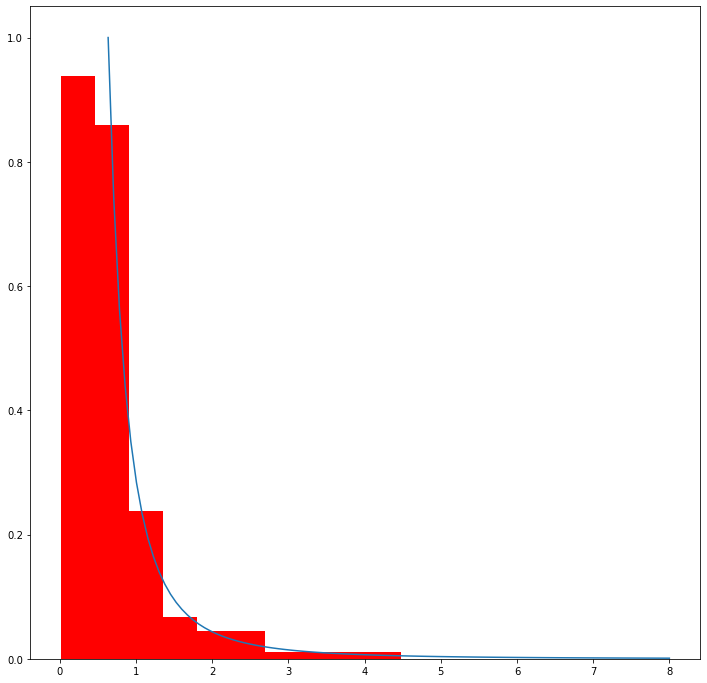

In [97]:
# остаточное время жизни для T
Z_minus = np.array([])
for i in range(1,199):
    Z_minus = np.append(Z_minus, T - S_n_for_T[i])
plt.figure(figsize=(12,12))
plt.plot(x_z, lim_density_Z(x_z))
plt.hist(Z_minus, density=True, color='r')
plt.show()

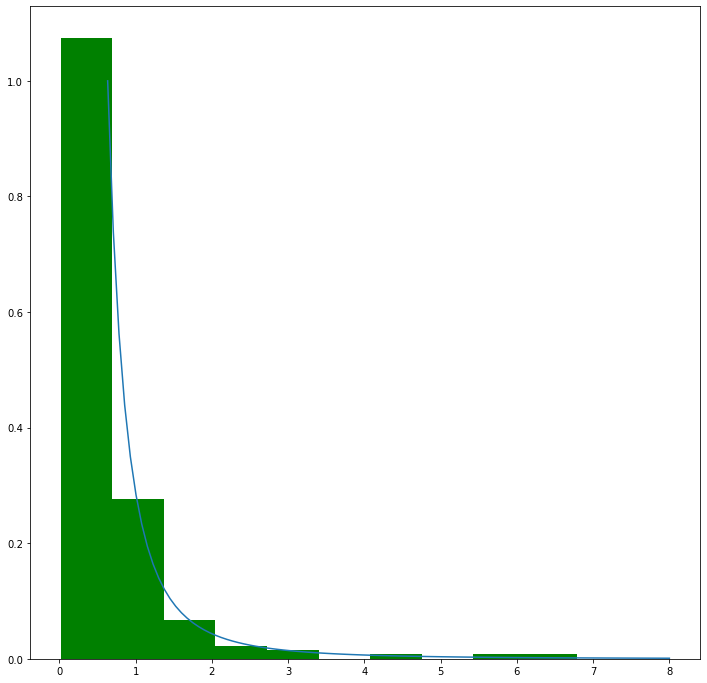

In [98]:
# возраст для T / 2

Z_plus_for_half_T = np.array([])
for i in range(1,199):
    Z_plus_for_half_T = np.append(Z_plus_for_half_T, S_n_plus_1_for_half_T[i] - T/2)
plt.figure(figsize=(12,12))
plt.plot(x_z, lim_density_Z(x_z))
plt.hist(Z_plus_for_half_T, density=True, color='g')
plt.show()

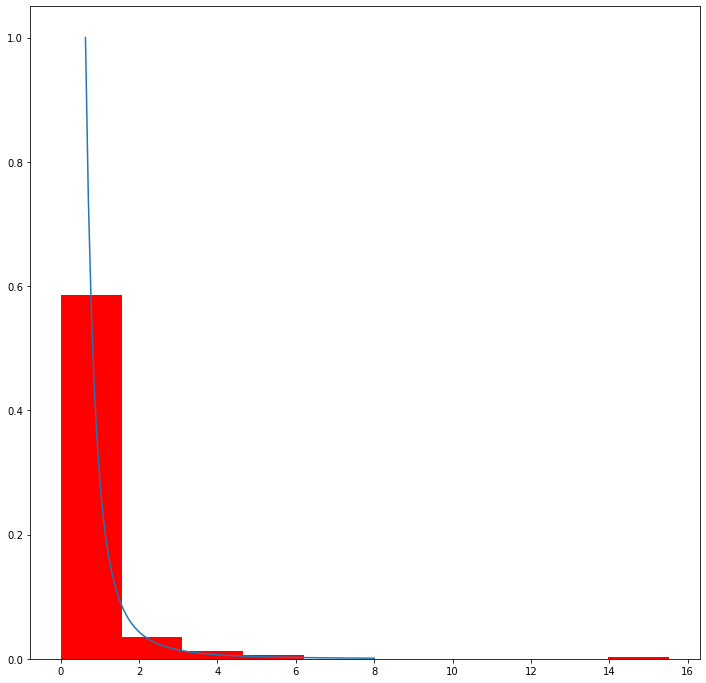

In [105]:
# остаточное время жизни для T / 2
Z_minus_for_half_T = np.array([])
for i in range(1,199):
    Z_minus_for_half_T = np.append(Z_minus_for_half_T, T/2 - S_n_for_half_T[i])
plt.figure(figsize=(12,12)) 
plt.plot(x_z, lim_density_Z(x_z))
plt.hist(Z_minus_for_half_T, density=True, color='r')
plt.show()